In [78]:
import cartopy.crs as ccrs
import cartopy
from cartopy import feature as cf
import xarray as xr
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import metpy

In [79]:
import metpy.calc as mpcals
from metpy.units import units

In [80]:
single_level= xr.open_dataset("SingleLevel.nc")
multi_level= xr.open_dataset("MultiLevel.nc")
multi_level

<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 61, level: 5, time: 72)
Coordinates:
  * longitude  (longitude) float32 -135.0 -134.8 -134.5 ... -115.5 -115.2 -115.0
  * latitude   (latitude) float32 25.0 24.75 24.5 24.25 ... 10.5 10.25 10.0
  * level      (level) int32 200 500 700 850 1000
  * time       (time) datetime64[ns] 2022-07-10 ... 2022-07-12T23:00:00
Data variables:
    cc         (time, level, latitude, longitude) float32 ...
    z          (time, level, latitude, longitude) float32 ...
    r          (time, level, latitude, longitude) float32 ...
    ciwc       (time, level, latitude, longitude) float32 ...
    clwc       (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    crwc       (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
    w          (time, level, latitude, longitude) float32 ...
    vo         (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-07 18:40:42 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

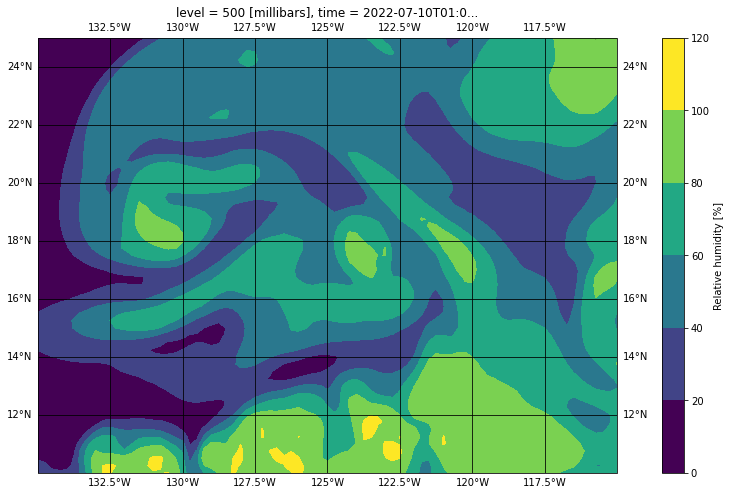

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
#plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, color='black')
multi_level.r[1,1,:,:].plot.contourf()
#plt.savefig(f'cape{i}.png')

In [82]:
multi_level['mixing_ratio'] = mpcals.mixing_ratio_from_relative_humidity(850* units.hPa, multi_level.t[:,3,:,:], multi_level.r[:,3,:,:])

In [83]:
multi_level

<xarray.Dataset>
Dimensions:       (longitude: 81, latitude: 61, level: 5, time: 72)
Coordinates:
  * longitude     (longitude) float32 -135.0 -134.8 -134.5 ... -115.2 -115.0
  * latitude      (latitude) float32 25.0 24.75 24.5 24.25 ... 10.5 10.25 10.0
  * level         (level) int32 200 500 700 850 1000
  * time          (time) datetime64[ns] 2022-07-10 ... 2022-07-12T23:00:00
Data variables: (12/13)
    cc            (time, level, latitude, longitude) float32 ...
    z             (time, level, latitude, longitude) float32 ...
    r             (time, level, latitude, longitude) float32 ...
    ciwc          (time, level, latitude, longitude) float32 ...
    clwc          (time, level, latitude, longitude) float32 ...
    q             (time, level, latitude, longitude) float32 ...
    ...            ...
    t             (time, level, latitude, longitude) float32 ...
    u             (time, level, latitude, longitude) float32 ...
    v             (time, level, latitude, longitude) float32 ...
    w             (time, level, latitude, longitude) float32 ...
    vo            (time, level, latitude, longitude) float32 ...
    mixing_ratio  (time, latitude, longitude) float32 <Quantity([[[0.00201892...
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-07 18:40:42 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [84]:
multi_level['vapour_pressure'] = mpcals.vapor_pressure(850* units.hPa, multi_level.mixing_ratio[:,:,:])

In [85]:
multi_level['dew_point_850'] = mpcals.dewpoint(multi_level.vapour_pressure[:,:,:])
multi_level

<xarray.Dataset>
Dimensions:          (longitude: 81, latitude: 61, level: 5, time: 72)
Coordinates:
  * longitude        (longitude) float32 -135.0 -134.8 -134.5 ... -115.2 -115.0
  * latitude         (latitude) float32 25.0 24.75 24.5 ... 10.5 10.25 10.0
  * level            (level) int32 200 500 700 850 1000
  * time             (time) datetime64[ns] 2022-07-10 ... 2022-07-12T23:00:00
Data variables: (12/15)
    cc               (time, level, latitude, longitude) float32 ...
    z                (time, level, latitude, longitude) float32 ...
    r                (time, level, latitude, longitude) float32 ...
    ciwc             (time, level, latitude, longitude) float32 ...
    clwc             (time, level, latitude, longitude) float32 ...
    q                (time, level, latitude, longitude) float32 ...
    ...               ...
    v                (time, level, latitude, longitude) float32 ...
    w                (time, level, latitude, longitude) float32 ...
    vo               (time, level, latitude, longitude) float32 ...
    mixing_ratio     (time, latitude, longitude) float32 <Quantity([[[0.00201...
    vapour_pressure  (time, latitude, longitude) float32 <Quantity([[[ 2.7502...
    dew_point_850    (time, latitude, longitude) float32 <Quantity([[[-10.528...
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-07 18:40:42 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [87]:
multi_level['mixing_ratio_700'] = mpcals.mixing_ratio_from_relative_humidity(700* units.hPa, multi_level.t[:,2,:,:], multi_level.r[:,2,:,:])

In [88]:
multi_level['vapour_pressure_700'] = mpcals.vapor_pressure(700* units.hPa, multi_level.mixing_ratio_700[:,:,:])

In [89]:
multi_level['dew_point_700'] = mpcals.dewpoint(multi_level.vapour_pressure_700[:,:,:])

In [90]:
multi_level['temp_deneme_700']= multi_level.t[:,2,:,:]* units.degC - 273 * units.degC

In [92]:
multi_level['dd_700'] = (multi_level.temp_deneme_700[:,:,:] - multi_level.dew_point_700[:,:,:])

In [93]:
multi_level

<xarray.Dataset>
Dimensions:              (longitude: 81, latitude: 61, level: 5, time: 72)
Coordinates:
  * longitude            (longitude) float32 -135.0 -134.8 ... -115.2 -115.0
  * latitude             (latitude) float32 25.0 24.75 24.5 ... 10.5 10.25 10.0
  * level                (level) int32 200 500 700 850 1000
  * time                 (time) datetime64[ns] 2022-07-10 ... 2022-07-12T23:0...
Data variables: (12/20)
    cc                   (time, level, latitude, longitude) float32 ...
    z                    (time, level, latitude, longitude) float32 ...
    r                    (time, level, latitude, longitude) float32 ...
    ciwc                 (time, level, latitude, longitude) float32 ...
    clwc                 (time, level, latitude, longitude) float32 ...
    q                    (time, level, latitude, longitude) float32 ...
    ...                   ...
    dew_point_850        (time, latitude, longitude) float32 <Quantity([[[-10...
    mixing_ratio_700     (time, latitude, longitude) float32 <Quantity([[[0.0...
    vapour_pressure_700  (time, latitude, longitude) float32 <Quantity([[[ 0....
    dew_point_700        (time, latitude, longitude) float32 <Quantity([[[-3....
    temp_deneme_700      (time, latitude, longitude) float32 <Quantity([[[11....
    dd_700               (time, latitude, longitude) float32 <Quantity([[[45....
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-07 18:40:42 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [94]:
multi_level['temp_deneme_850']= multi_level.t[:,3,:,:]* units.degC - 273 * units.degC

In [97]:
multi_level['temp_deneme_500']= multi_level.t[:,1,:,:]* units.degC - 273 * units.degC

In [98]:
multi_level

<xarray.Dataset>
Dimensions:              (longitude: 81, latitude: 61, level: 5, time: 72)
Coordinates:
  * longitude            (longitude) float32 -135.0 -134.8 ... -115.2 -115.0
  * latitude             (latitude) float32 25.0 24.75 24.5 ... 10.5 10.25 10.0
  * level                (level) int32 200 500 700 850 1000
  * time                 (time) datetime64[ns] 2022-07-10 ... 2022-07-12T23:0...
Data variables: (12/22)
    cc                   (time, level, latitude, longitude) float32 ...
    z                    (time, level, latitude, longitude) float32 ...
    r                    (time, level, latitude, longitude) float32 ...
    ciwc                 (time, level, latitude, longitude) float32 ...
    clwc                 (time, level, latitude, longitude) float32 ...
    q                    (time, level, latitude, longitude) float32 ...
    ...                   ...
    vapour_pressure_700  (time, latitude, longitude) float32 <Quantity([[[ 0....
    dew_point_700        (time, latitude, longitude) float32 <Quantity([[[-3....
    temp_deneme_700      (time, latitude, longitude) float32 <Quantity([[[11....
    dd_700               (time, latitude, longitude) float32 <Quantity([[[45....
    temp_deneme_850      (time, latitude, longitude) float32 <Quantity([[[16....
    temp_deneme_500      (time, latitude, longitude) float32 <Quantity([[[ -5...
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-07 18:40:42 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [74]:
multi_level['dd'] = (multi_level.temp_deneme[:,:,:] - multi_level.dew_point[:,:,:])

In [75]:
multi_level

<xarray.Dataset>
Dimensions:          (longitude: 81, latitude: 61, level: 5, time: 72)
Coordinates:
  * longitude        (longitude) float32 -135.0 -134.8 -134.5 ... -115.2 -115.0
  * latitude         (latitude) float32 25.0 24.75 24.5 ... 10.5 10.25 10.0
  * level            (level) int32 200 500 700 850 1000
  * time             (time) datetime64[ns] 2022-07-10 ... 2022-07-12T23:00:00
Data variables: (12/17)
    cc               (time, level, latitude, longitude) float32 ...
    z                (time, level, latitude, longitude) float32 ...
    r                (time, level, latitude, longitude) float32 ...
    ciwc             (time, level, latitude, longitude) float32 ...
    clwc             (time, level, latitude, longitude) float32 ...
    q                (time, level, latitude, longitude) float32 ...
    ...               ...
    vo               (time, level, latitude, longitude) float32 ...
    mixing_ratio     (time, latitude, longitude) float32 <Quantity([[[0.00201...
    vapour_pressure  (time, latitude, longitude) float32 <Quantity([[[ 2.7502...
    dew_point        (time, latitude, longitude) float32 <Quantity([[[-10.528...
    dd               (time, latitude, longitude) float32 <Quantity([[[2.74091...
    temp_deneme      (time, latitude, longitude) float32 <Quantity([[[16.8803...
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-07 18:40:42 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [111]:
multi_level['K_index_1'] = (multi_level.temp_deneme_850[:,:,:] -multi_level.temp_deneme_500[:,:,:]) + multi_level.dew_point_850 - (multi_level.temp_deneme_700- multi_level.dew_point_700)

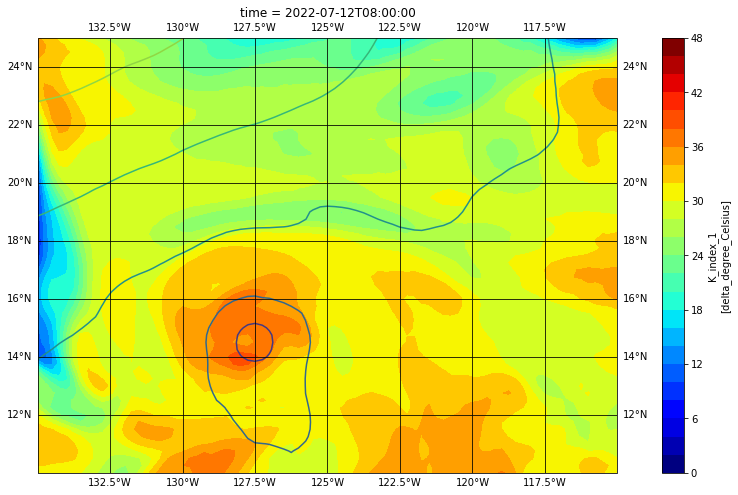

In [116]:
for i in range(33,57):
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16, 8))
    #plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(draw_labels=True, color='black')
    single_level.msl[i,:,:].plot.contour()
    multi_level.K_index_1[i,:,:].plot.contourf(levels=np.arange(0, 50, 2),cmap='jet')
    plt.savefig(f'k{i}.png')

In [103]:
multi_level

<xarray.Dataset>
Dimensions:              (longitude: 81, latitude: 61, level: 5, time: 72)
Coordinates:
  * longitude            (longitude) float32 -135.0 -134.8 ... -115.2 -115.0
  * latitude             (latitude) float32 25.0 24.75 24.5 ... 10.5 10.25 10.0
  * level                (level) int32 200 500 700 850 1000
  * time                 (time) datetime64[ns] 2022-07-10 ... 2022-07-12T23:0...
Data variables: (12/23)
    cc                   (time, level, latitude, longitude) float32 0.0 ... 0.0
    z                    (time, level, latitude, longitude) float32 1.218e+05...
    r                    (time, level, latitude, longitude) float32 44.28 ......
    ciwc                 (time, level, latitude, longitude) float32 -2.91e-11...
    clwc                 (time, level, latitude, longitude) float32 0.0 ... 0.0
    q                    (time, level, latitude, longitude) float32 2.708e-05...
    ...                   ...
    dew_point_700        (time, latitude, longitude) float32 <Quantity([[[-3....
    temp_deneme_700      (time, latitude, longitude) float32 <Quantity([[[11....
    dd_700               (time, latitude, longitude) float32 <Quantity([[[45....
    temp_deneme_850      (time, latitude, longitude) float32 <Quantity([[[16....
    temp_deneme_500      (time, latitude, longitude) float32 <Quantity([[[ -5...
    K_index              (time, latitude, longitude) float32 <Quantity([[[-12...
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-07 18:40:42 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

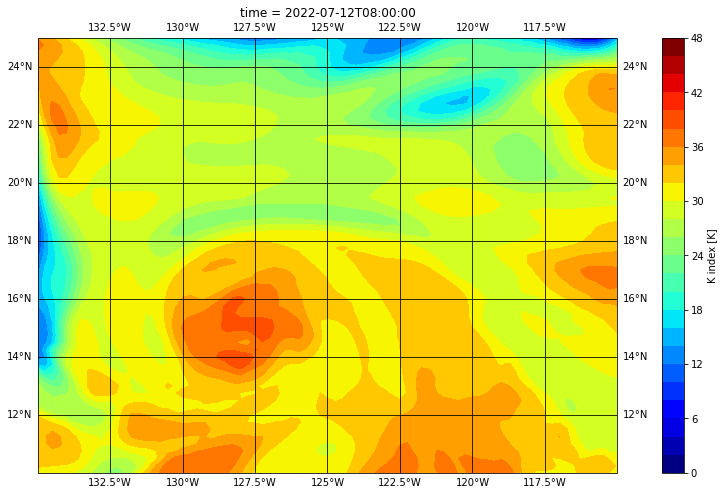

In [115]:
for i in range(33,57):
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16, 8))
    #plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(draw_labels=True, color='black')
    single_level.kx[i,:,:].plot.contourf(levels=np.arange(0, 50, 2),cmap='jet')
    plt.savefig(f'rk{i}.png')